<a href="https://colab.research.google.com/github/paarthvisharma/ML-Techniques/blob/main/Assignment4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Anomaly Detection (30 points)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [11, 3, 8, 10, 12, 5, 1, 50]

Using a box plot, show the outliers in the box plot.

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score.

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

**Question 1 Part A**

In [107]:
# Importing the required libraries for Question 1
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

Quartile range :  [ 1.    4.5   9.   11.25 50.  ]
Inter Quartile Range :  6.75
Lower Bound -5.625
Upper Bound 21.375
Outliers in dataset are [50]


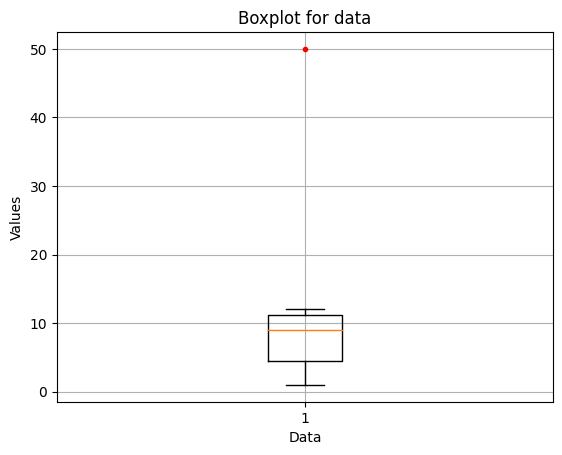

In [82]:
# Defining Data
data = [11, 3, 8, 10, 12, 5, 1, 50]
data.sort()

# Calculating the Quartile range
x = np.quantile(data, [0,0.25,0.5,0.75,1])
print("Quartile range : ", x)

# Getting IQR (Interquartile Range) value
q3 = np.percentile(data, 75)
q1 = np.percentile(data, 25)
iqr = q3 - q1
print("Inter Quartile Range : ", iqr)

# Calculating and priniting the lower and upper bounds
print("Lower Bound" , q1 - 1.5 * iqr)
print("Upper Bound" , q3 + 1.5 * iqr)

# Calculating and printing the outliers
outliers = [i for i in data if i <  (q1 - 1.5 * iqr) or i > (q3 + 1.5 * iqr)]
print("Outliers in dataset are" , outliers)

# Plotting the graph
plt.boxplot(data, sym='r.')
plt.title('Boxplot for data')
plt.xlabel('Data')
plt.ylabel('Values')
plt.grid(True)
plt.show()

**Question 1 Part B**

Outliers in dataset are [50]


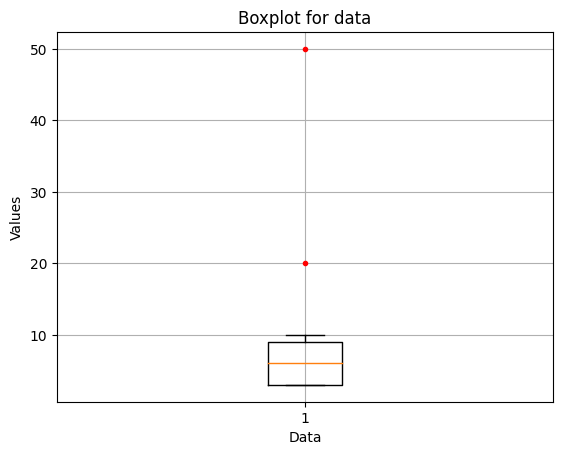

In [83]:
#  Z score tells how many standard deviations away a data point is from the mean.

# Z score = (x -mean) / std. deviation
data =  [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
# mean = np.mean(data)
# deviation = np.std(data)

# Function for calculating z_score:
def z_score_calculate(threshold, data):
  mean = np.mean(data)
  deviation = np.std(data)
  outliers = []
  for i in data:
      z_score = (i - mean)/deviation
      # print(z_score)
      if z_score > threshold:
        outliers.append(i)
  return outliers

print('Outliers in dataset are', z_score_calculate(3, data))

plt.boxplot(data, sym='r.')
plt.title('Boxplot for data')
plt.xlabel('Data')
plt.ylabel('Values')
plt.grid(True)
plt.show()

**Question 1 Part C**

In [68]:
# STEP 1
# Importing the dataset
df = pd.read_csv("Q1_dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


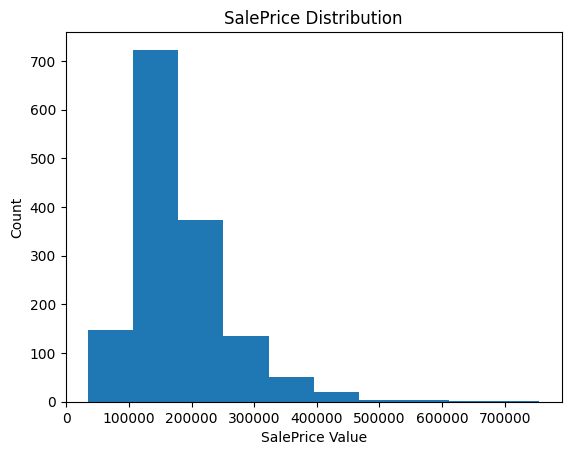

In [100]:
# Plotting histogram for SalePrice
plt.hist(df['SalePrice'])
plt.xlabel('SalePrice Value')
plt.ylabel('Count')
plt.title('SalePrice Distribution')
plt.show()

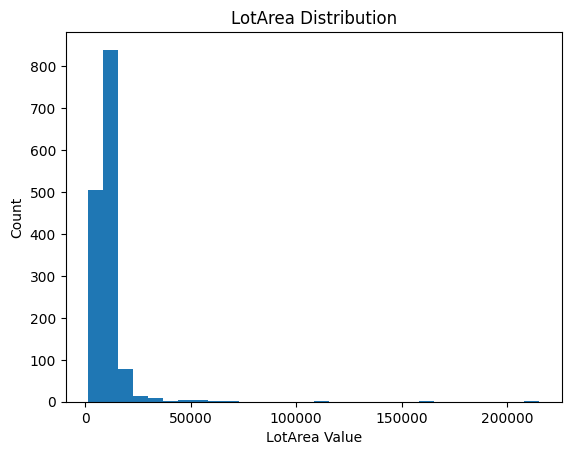

In [99]:
# Plotting histogram for LotArea
plt.hist(df['LotArea'], bins=30)
plt.xlabel('LotArea Value')
plt.ylabel('Count')
plt.title('LotArea Distribution')
plt.show()

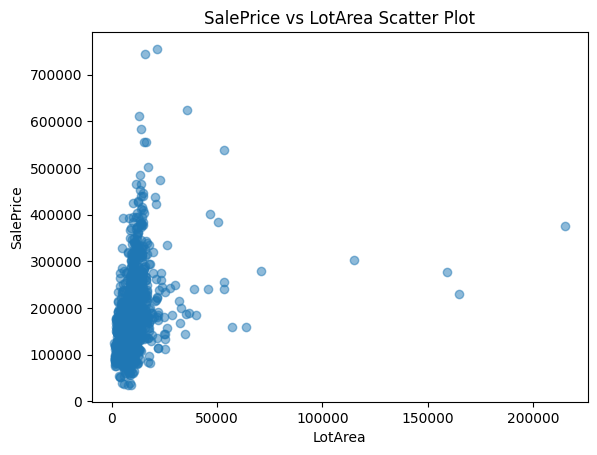

In [95]:
# Plotting scatter plot for SalePrice vs LotArea
plt.scatter(df['LotArea'], df['SalePrice'], alpha = 0.5)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs LotArea Scatter Plot')
plt.show()

In [105]:
# STEP 2
# Calculating zscore for SalePrice
def zscores(data):
    mean = data.mean()
    deviation = data.std()
    z_scores = (data - mean) / deviation
    return z_scores
z_scores = zscores(df['SalePrice'].dropna())

# Define different threshold values
threshold_values= [2, 2.5, 3, 3.25]  # Set your desired thresholds

outliers = {}
for i in threshold_values:
    outliers[f'Threshold_{i}'] = df['SalePrice'][abs(z_scores) > i]
print("Outliers", outliers)

Outliers {'Threshold_2': 11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1353    410000
1373    466500
1388    377500
1417    340000
1437    394617
Name: SalePrice, Length: 63, dtype: int64, 'Threshold_2.5': 53      385000
58      438780
112     383970
161     412500
178     501837
185     475000
224     386250
231     403000
278     415298
349     437154
378     394432
389     426000
440     555000
473     440000
477     380000
496     430000
515     402861
527     446261
591     451950
661     402000
664     423000
688     392000
691     755000
769     538000
774     395000
798     485000
803     582933
825     385000
898     611657
987     395192
1046    556581
1142    424870
1169    625000
1181    392500
1182    745000
1243    465000
1268    381000
1353    410000
1373    466500
1437    394617
Name: SalePrice, dtype: int64, 'Threshold_3': 58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000

In [106]:
# STEP 3
# Iterating through the dictionary to calculate the number of outliers removed for a threshold
for key, value in outliers.items():
     print(f"Number of outliers removed for {key} : {len(value)}")

Number of outliers removed for Threshold_2 : 63
Number of outliers removed for Threshold_2.5 : 40
Number of outliers removed for Threshold_3 : 22
Number of outliers removed for Threshold_3.25 : 16


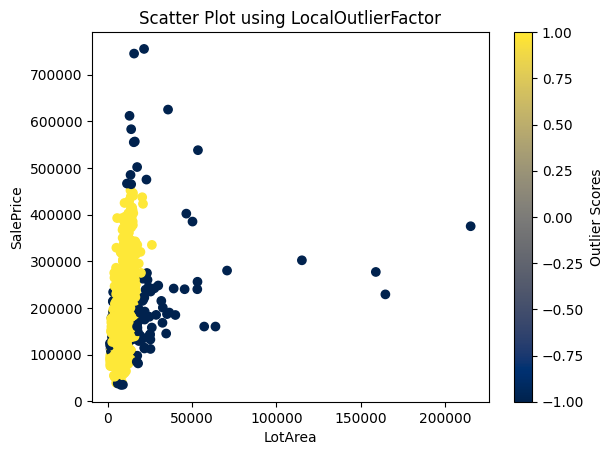

In [117]:
# STEP 4
# Initialzing the LocalOutlierFactor class
LOF = LocalOutlierFactor()
outliers = LOF.fit_predict(df[['SalePrice', 'LotArea']])

# Scatter Plot
plt.scatter(df['LotArea'], df['SalePrice'], c=outliers, cmap='cividis')
plt.colorbar(label='Outlier Scores')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot using LocalOutlierFactor')
plt.show()

## 2. PCA (35 points)

Accuracy Comparison for Logistic Regression model: before and after PCA.
Please follow the following steps:

  1. Seperate and standardize the disease classification dataset. (5 points)
  2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
  3. Primary Component Selection. (Select the first 6 components) (5 points)
  4. Projection in a New Feature Space. (5 points)
  5. Principal Component Analysis. (5 points)
  6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

STEP 0: Importing the required libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

STEP 1: Seperating and standardizing the disease classification dataset:

In [28]:
df2 = pd.read_csv("Q2_dataset.csv")
df2.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [29]:
X = df2.drop(columns = ["class"])
X.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [30]:
y = df2["class"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [31]:
# Data distribution
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [32]:
# Scaling the features
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)
X_scaled

array([[-1.72519117,  0.96874225,  0.62764391, ..., -0.775137  ,
        -0.81472704, -0.36659507],
       [-1.72519117,  0.96874225,  0.12161952, ..., -0.52664699,
        -0.58297219,  0.40039616],
       [-1.72519117,  0.96874225,  0.61795018, ..., -0.75606253,
        -0.8043897 , -0.7809355 ],
       ...,
       [ 1.72519117, -1.03226633,  0.81336154, ..., -0.71674252,
        -0.79017671, -0.77287314],
       [ 1.72519117, -1.03226633,  0.54105055, ..., -0.77132466,
        -0.82631929, -0.81173208],
       [ 1.72519117, -1.03226633,  0.3945807 , ..., -0.68658105,
        -0.84098293, -0.82811405]])

In [33]:
# Dividing into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.20, random_state=42)

STEP 2: Eigen decomposition using any LA library and displaying the scree plot:

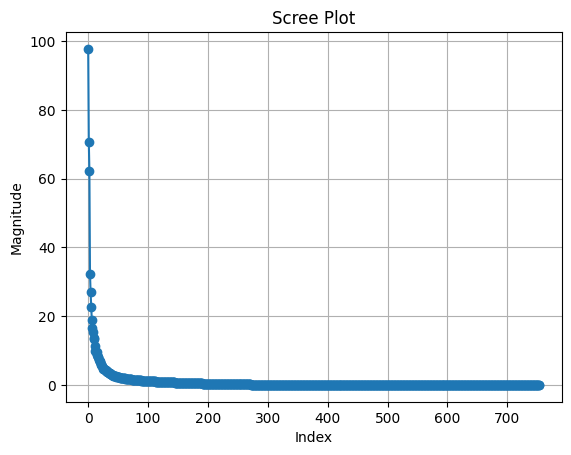

In [38]:
# Building the feature covariance matrix
matrix = np.cov(X_scaled.T)

# Eigen decomponsition to get the values and vectors
evalues, evectors = np.linalg.eig(matrix)

# Sorting the eigen values and getting the indexes
index = np.argsort(evalues)[::-1]
sorted_evalues = evalues[index]

# Plotting
plt.plot(sorted_evalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


STEP 3: Primary Component Selection

In [49]:
pca = PCA(n_components=6)
pca.fit(X_train)
results = pca.transform(X_train)
results_dataframe = pd.DataFrame(results)
results_dataframe.head()

,0,1,2,3,4,5
0,-8.357323,-13.796002,17.940830,2.165197,9.549472,-3.386370
1,2.319185,4.912045,-9.853241,-2.360511,-2.775554,1.273157
2,1.029927,-9.108698,4.616894,0.260537,1.936839,-0.265382
3,-0.358960,0.973268,-6.653719,-2.929944,0.675249,-6.261310
4,-0.913477,-5.939569,2.198366,-2.463424,1.625627,-1.738042


In [50]:
# Selecting the primary components
primary_components = 6
selected_evectors = evectors[:, index[:primary_components]]
selected_evectors

array([[-0.00734344, -0.00116719,  0.00651538, -0.01492142, -0.02300192,
        -0.02108613],
       [ 0.04502657, -0.04700965, -0.00629257,  0.02420969,  0.01025892,
        -0.0093586 ],
       [-0.0173696 , -0.01045381, -0.05766351,  0.01222901, -0.0054791 ,
        -0.02363094],
       ...,
       [ 0.01324704,  0.00858509, -0.0217637 ,  0.01327137,  0.03581234,
         0.023377  ],
       [ 0.01942424,  0.01718094, -0.02271759,  0.01791082,  0.02336868,
         0.02014452],
       [ 0.02902069,  0.03571027, -0.02900893,  0.02433487,  0.01406922,
         0.01866721]])

STEP 4: Projection in a New Feature Space:

In [51]:
# Projecting the features into a new feature space
X_train_pca = X_train.dot(selected_evectors)
X_test_pca = X_test.dot(selected_evectors)

In [52]:
X_train_pca

array([[-11.50812544,  21.78935497,  -1.15996014,  -1.14796816,
         -9.38657442,   2.64895865],
       [  4.11073386, -11.23243336,  -1.33584795,  -1.23026523,
          2.31679219,  -2.13733936],
       [  0.5798147 ,   9.02273358,  -4.19093446,  -0.28136846,
         -1.55899623,   0.60008711],
       ...,
       [  1.09306402,  -5.9435474 ,   4.23572527,  -3.61702519,
         -4.08936847,   6.42183119],
       [ -7.37198031,  -7.81295173,  -0.92670755,   7.58404705,
         -0.36810978,   0.75168078],
       [ -6.38398379,  -5.16232531,   5.30185833,  -9.37699668,
         -5.37759756,  -4.31864025]])

STEP 5 & 6: Principal Component Analysis and Compare of logistic regression before and after PCA :

Logistic Regression before PCA

In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression before PCA", accuracy)

Accuracy of Logistic Regression before PCA 0.868421052631579


In [43]:
precision = precision_score(y_test, y_pred)
print("Precision of Logistic Regression before PCA", precision)

Precision of Logistic Regression before PCA 0.8983050847457628


In [44]:
recall = recall_score(y_test, y_pred)
print("Recall of Logistic Regression before PCA", recall)

Recall of Logistic Regression before PCA 0.9298245614035088


Logistic Regression after PCA

In [45]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
y_pred_pca

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [46]:
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy of Logistic Regression after PCA", accuracy_pca)

Accuracy of Logistic Regression after PCA 0.8618421052631579


In [47]:
precision_pca = precision_score(y_test, y_pred_pca)
print("Precision of Logistic Regression after PCA", precision_pca)

Precision of Logistic Regression after PCA 0.8661417322834646


In [48]:
recall_pca = recall_score(y_test, y_pred_pca)
print("Recall of Logistic Regression after PCA", recall_pca)

Recall of Logistic Regression after PCA 0.9649122807017544


## 3. EM Algorithm (35 points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

```

(1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)
```python
class Gaussian:
"Model univariate Gaussian"
def __init__(self, mu, sigma):
    #mean and standard deviation


#probability density function
def pdf(self, datum):
    "Probability of a data point given the current parameters"
```

(2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result(Do not use sklearn GaussianMixture): (30 points)
```python
class GaussianMixture_self:
"Model mixture of two univariate Gaussians and their EM estimation"

def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):


def Estep(self):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"

def Mstep(self, weights):
    "Perform an M(aximization)-step"

def iterate(self, N=1, verbose=False):
    "Perform N iterations, then compute log-likelihood"

def pdf(self, x):
        
```

In [17]:
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)
data

array([ 4.64074448,  6.81651951,  7.03072555, ...,  1.31156282,
       -0.03926955,  0.8870378 ])

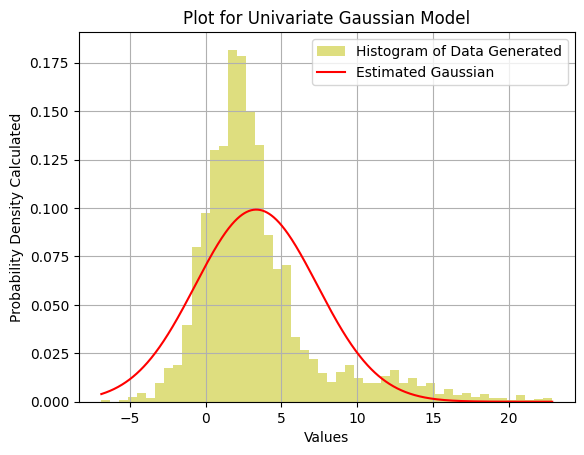

In [25]:
class Gaussian:
# "Model univariate Gaussian"
    def __init__(self, mu, sigma):
        # Initializing the mean and standard deviation values
        self.mu = mu
        self.sigma = sigma

    def pdf(self, datum):
        # Calculating the probability density function
        return (1.0 / (np.sqrt(2 * np.pi) * self.sigma)) * (np.exp(-0.5 * ((datum - self.mu) / self.sigma) ** 2))

# Using the above Gaussian class, creating the model and passing the mean and deviation values
mean_value = np.mean(data)
sigma_value = np.std(data)
gaussian_value = Gaussian(mean_value, sigma_value)

# Plotting the graph
plt.hist(data, bins=50, density=True, alpha=0.5, color='y', label='Histogram of Data Generated')
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, gaussian_value.pdf(x), 'r', label='Estimated Gaussian')
plt.title('Plot for Univariate Gaussian Model')
plt.xlabel('Values')
plt.ylabel('Probability Density Calculated')
plt.legend()
plt.grid()
plt.show()


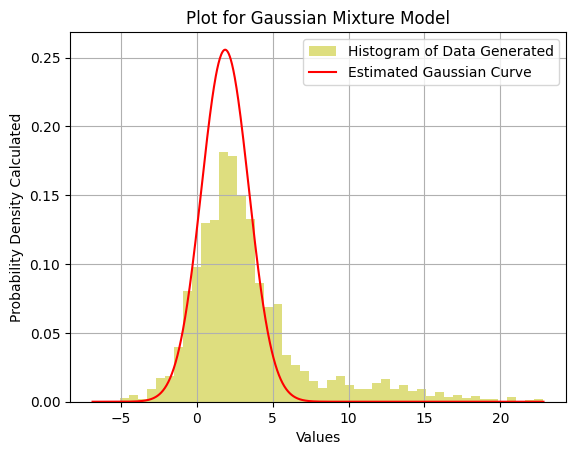

In [21]:
# Class for two univariate Gaussians and their EM estimation
class GaussianMixture_self:
# Model mixture of two univariate Gaussians and their EM estimation
    def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):
      # Initializing all the parameters, including data, min and max mean, min and max standard deviation and mixing coefficient
        self.data = data
        self.mu_1 = np.random.uniform(mu_min, mu_max)
        self.mu_2 = np.random.uniform(mu_min, mu_max)
        self.sigma_1 = np.random.uniform(sigma_min, sigma_max)
        self.sigma_2 = np.random.uniform(sigma_min, sigma_max)
        self.mix = mix

    def Estep(self):
        # Calculate the probability density functions of each Gaussian Model using the same formula as the above
        pdf_1 = (1.0 / (np.sqrt(2 * np.pi) * self.sigma_1)) * np.exp(-0.5 * ((self.data - self.mu_1) / self.sigma_1) ** 2)
        pdf_2 = (1.0 / (np.sqrt(2 * np.pi) * self.sigma_2)) * np.exp(-0.5 * ((self.data - self.mu_2) / self.sigma_2) ** 2)
        # Calculating total using sum of weighted probability density functions
        total_pdf = pdf_1 + pdf_2
        # Calculating weights for each Gaussian component
        self.weights_1 = self.mix * pdf_1 / total_pdf
        self.weights_2 = (1 - self.mix) * pdf_2 / total_pdf

    def Mstep(self):
        # Mstep is the Maximization step and involves using the responsibilities of the Gaussian Distributions computed in previous step to update the model parameters
        # Updaing mean and standard deviation values for both the models
        self.mu_1 = np.sum(self.weights_1 * self.data) / np.sum(self.weights_1)
        self.mu_2 = np.sum(self.weights_2 * self.data) / np.sum(self.weights_2)
        self.sigma_1 = np.sqrt(np.sum(self.weights_1 * (self.data - self.mu_1) ** 2) / np.sum(self.weights_1))
        self.sigma_2 = np.sqrt(np.sum(self.weights_2 * (self.data - self.mu_2) ** 2) / np.sum(self.weights_2))
        # Updating the mixing coefficient
        self.mix = np.mean(self.weights_1)

    def iterate(self, N=1, verbose=False):
        # Iterate over various steps
        for i in range(N):
            self.Estep()
            self.Mstep()

    def pdf(self, x):
        # Calculate the probability density functions of each Gaussian Model using the same formula as the above
        pdf_1 = (1.0 / (np.sqrt(2 * np.pi) * self.sigma_1)) * np.exp(-0.5 * ((x - self.mu_1) / self.sigma_1) ** 2)
        pdf_2 = (1.0 / (np.sqrt(2 * np.pi) * self.sigma_2)) * np.exp(-0.5 * ((x - self.mu_2) / self.sigma_2) ** 2)
        return self.mix * pdf_1 + (1 - self.mix) * pdf_2

# Creating the model using the above class
GMM = GaussianMixture_self(data)
GMM.iterate(N=100, verbose=True)  # Adjust the number of iterations as needed

# Plotting the Gaussian Mixture Model
plt.hist(data, bins=50, density=True, alpha=0.5, color='y', label='Histogram of Data Generated')
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, GMM.pdf(x), 'r', label='Estimated Gaussian Curve')
plt.title('Plot for Gaussian Mixture Model')
plt.xlabel('Values')
plt.ylabel('Probability Density Calculated')
plt.legend()
plt.grid()
plt.show()
